# Goal
In the part of the loan prediction model, we saw that the credit score heavily influenced the loan decision. However, we want to see if there might be improvement to the model by scaling the data

## Import the libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

## Import the Dataset

In [18]:
df = pd.read_csv("loan.csv")
df.head()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [19]:
df.describe()

,age,income,credit_score
count,61.000000,61.000000,61.000000
mean,37.081967,78983.606557,709.836066
std,8.424755,33772.025802,72.674888
min,24.000000,25000.000000,560.000000
25%,30.000000,52000.000000,650.000000
50%,36.000000,78000.000000,720.000000
75%,43.000000,98000.000000,770.000000
max,55.000000,180000.000000,830.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


## Split the dataset

In [21]:
from sklearn.model_selection import train_test_split
X = df.drop("loan_status", axis = 1)
y = df["loan_status"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state =42)

## Encoding and normalization of data

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_features = ['age', 'income', 'credit_score']
categorical_features = ['gender', 'occupation', 'education_level', 'marital_status']

In [28]:
scaler = StandardScaler()
encoder = OneHotEncoder(handle_unknown='ignore')

X_train_num = scaler.fit_transform(X_train[numeric_features])
X_train_cat = encoder.fit_transform(X_train[categorical_features])

X_test_num = scaler.transform(X_test[numeric_features])
X_test_cat = encoder.transform(X_test[categorical_features])

X_train_final = np.hstack((X_train_num, X_train_cat.toarray()))
X_test_final = np.hstack((X_test_num, X_test_cat.toarray()))

encoded_cols = encoder.get_feature_names_out(categorical_features)
all_features_names = numeric_features + list(encoded_cols)
X_train_df = pd.DataFrame(X_train_final, columns = all_features_names)
X_train_df.head()

,age,income,credit_score,gender_Female,gender_Male,occupation_Accountant,occupation_Analyst,occupation_Architect,occupation_Artist,occupation_Banker,...,occupation_Teacher,occupation_Veterinarian,occupation_Writer,education_level_Associate's,education_level_Bachelor's,education_level_Doctoral,education_level_High School,education_level_Master's,marital_status_Married,marital_status_Single
0,1.674576,0.721081,0.938110,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.804935,0.131942,0.373479,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.432232,1.310220,1.220425,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.064705,0.338141,0.514637,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.556467,1.162935,1.079267,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Training the model

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr_model = LogisticRegression()

In [31]:
lr_model.fit(X_train_final, y_train)

LogisticRegression()

## Evaluating the model

In [33]:
y_pred = lr_model.predict(X_test_final)

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9230769230769231


In [39]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

    Approved       1.00      0.89      0.94         9
      Denied       0.80      1.00      0.89         4

    accuracy                           0.92        13
   macro avg       0.90      0.94      0.92        13
weighted avg       0.94      0.92      0.93        13



In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

numeric_features = ['age', 'income', 'credit_score']
categorical_features = ['gender', 'occupation', 'education_level', 'marital_status', 'loan_status']

### checking to see variable with much influence

In [56]:
feature_importance = pd.DataFrame({'Feature': all_features_names, 'Importance': lr_model.coef_[0]})

In [57]:
feature_importance['Importance'] = feature_importance['Importance'].abs()
feature_importance = feature_importance.sort_values(by = 'Importance', ascending = False)
feature_importance.head()

,Feature,Importance
2,credit_score,1.451081
1,income,1.060722
0,age,0.685324
44,education_level_Master's,0.504806
45,marital_status_Married,0.413963


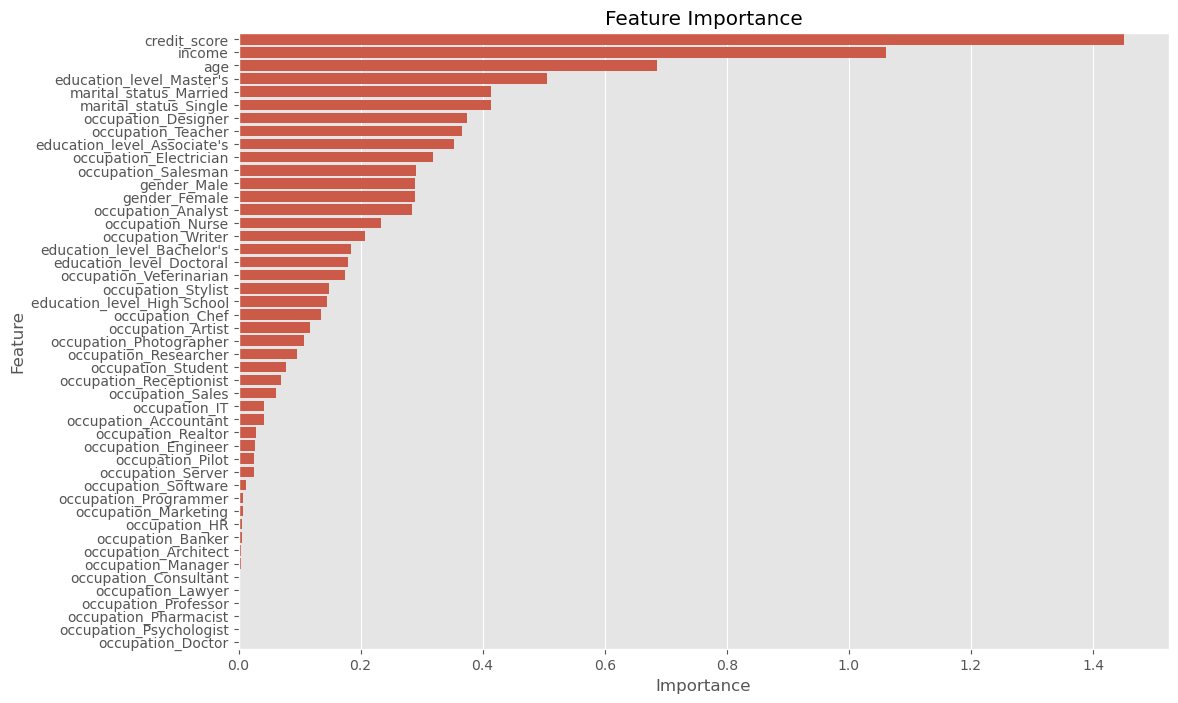

In [59]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'Importance', y = 'Feature', data = feature_importance)
plt.title("Feature Importance")
plt.show()

## Conclusion
The model performs better after implementing normalization of data. Credit Score, income, and age are the leading factors that influence loan approval